# Decay chain

Get isotopic concentration from decay chain of A, where only the amount
of A is defined at the beginning.

Solve using Forward Euler method.

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()


def uniform_time(end_time, delta_t):
    steps = int(end_time / delta_t)
    times = delta_t * np.arange(steps + 1)

    return times, steps


def plot_decay(results):
    results.plot()
    plt.legend(loc='right')
    ax = plt.gca()
    ax.set_ylabel('atoms (-)')

    return ax

ABC decay chain example

Bismuth decay chain

- A is Bi-210
- B is Po-210
- C is PB-206

In [8]:
def decay_ABC(A_data, B_data, delta_t, steps):
    # decay constant in 1/days
    A_dec = np.log(2) / A_data['halflife']
    B_dec = np.log(2) / B_data['halflife']

    # numbers of atoms at each time step
    A = np.zeros(steps + 1)
    B = np.zeros(steps + 1)
    C = np.zeros(steps + 1)

    A[0] = A_data['start']

    for i, (a, b, c) in enumerate(zip(A[:-1], B[:-1], C[:-1])):
        F = i + 1

        A[F] = a \
              /(1 + delta_t*A_dec)
        B[F] = (b + delta_t*A[F]*A_dec) \
              /(1 + delta_t*B_dec)
        C[F] = c + delta_t*B[F]*B_dec

    return A, B, C

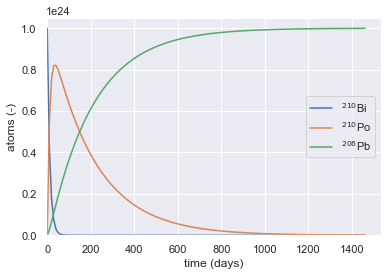

In [9]:
# set isotopes
A_data = {'label': '$^{210}$Bi',
          'halflife': 5.,
          'start': 1e24}

B_data = {'label': '$^{210}$Po',
          'halflife': 138.}

C_data = {'label': '$^{206}$Pb'}

# set time parameters in days
end_time = 4.0 * 365.

delta_t = 10.
times, steps = uniform_time(end_time, delta_t)

# calculate and plot
A, B, C = decay_ABC(A_data, B_data, delta_t, steps)

results = pd.DataFrame(np.stack((times, A, B, C), axis=-1),
                       columns=['time (days)', A_data['label'], B_data['label'], C_data['label']])
results = results.set_index('time (days)')

ax = plot_decay(results)
ax.set_xlim(xmin=-5)
ax.set_ylim(ymin=0)

plt.savefig('decay_chain_BiPoPb.pdf', bbox_inches='tight')

ABCD decay chain example. Trivial extension of the previous one.

This example will start with A as Rubidium and end as D Zirconium

In [10]:
def decay_ABCD(A_data, B_data, C_data, delta_t, steps):
    # decay constant in 1/days
    A_dec = np.log(2) / A_data['halflife']
    B_dec = np.log(2) / B_data['halflife']
    C_dec = np.log(2) / C_data['halflife']

    # numbers of atoms at each time step
    A = np.zeros(steps + 1)
    B = np.zeros(steps + 1)
    C = np.zeros(steps + 1)
    D = np.zeros(steps + 1)

    A[0] = A_data['start']

    for i, (a, b, c, d) in enumerate(zip(A[:-1], B[:-1], C[:-1], D[:-1])):
        F = i + 1

        A[F] = a \
              /(1 + delta_t*A_dec)
        B[F] = (b + delta_t*A[F]*A_dec) \
              /(1 + delta_t*B_dec)
        C[F] = (c + delta_t*B[F]*B_dec) \
              /(1 + delta_t*C_dec)
        D[F] = d + delta_t*C[F]*C_dec

    return A, B, C, D

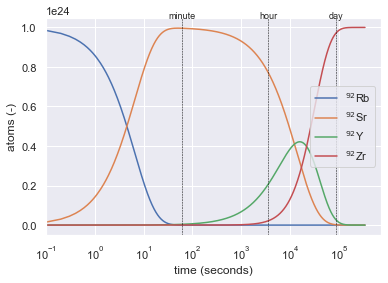

In [12]:
# set isotopes
A_data = {'label': '$^{92}$Rb',
          'halflife': 4.492,
          'start': 1e24}

B_data = {'label': '$^{92}$Sr',
          'halflife': 9576.}

C_data = {'label': '$^{92}$Y',
          'halflife': 12744.}

D_data = {'label': '$^{92}$Zr'}

# set time parameters in seconds
end_time = 4* 24 * 60 * 60.

delta_t = 0.1
times, steps = uniform_time(end_time, delta_t)

# calculate and plot
A, B, C, D = decay_ABCD(A_data, B_data, C_data, delta_t, steps)

results = pd.DataFrame(np.stack((times, A, B, C, D), axis=-1),
                       columns=['time (seconds)', A_data['label'], B_data['label'], C_data['label'], D_data['label']])
results = results.set_index('time (seconds)')

ax = plot_decay(results)

ax.set_xscale('log')
ax.set_xlim(xmin=1E-1)

min = 60
hour = min * 60
day = hour * 24
month = day * 30

top = 1.06e24

ax.axvline(min, ymax=1,
           color='black',
           linewidth='0.5',
           linestyle='--')
ax.text(min, top, 'minute',
        fontsize=9,
        horizontalalignment='center',
        verticalalignment='center')

ax.axvline(hour, ymax=1,
           color='black',
           linewidth='0.5',
           linestyle='--')
ax.text(hour, top, 'hour',
        fontsize=9,
        horizontalalignment='center',
        verticalalignment='center')

ax.axvline(day, ymax=1,
           color='black',
           linewidth='0.5',
           linestyle='--')
ax.text(day, top, 'day',
        fontsize=9,
        horizontalalignment='center',
        verticalalignment='center')

ax.axvline(month, ymax=1,
           color='black',
           linewidth='0.5',
           linestyle='--')

plt.savefig('decay_chain_RbSrYZr.pdf', bbox_inches='tight')